<a href="https://colab.research.google.com/github/PraveenPrabhat125/Python-for-Data-Analyst/blob/main/Exploratory_Data_Analysis_Project_NHANES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introduction
In this final assignment, I will use a dataset from a survey held by NHANES in 2015-2016. I collected the dataset from kaggle. I will conduct descriptive and diagnostic analysis with the aim to collect and compare data of BMI in different age group and gender.

This dataset consists of 28 columns and 5735 rows. Among 28 columns, I isolated some columns which are related to my analysis.

Brief explanation of the column :

- SEQN = Respondent sequence number (
- SMQ020 = Smoking
- RIAGENDR = Gender
- RIDAGEYR = Age (years)
- DMDEDUC2 = Education level
- BMXWT = Weight (kg)
- BMXHT = Height (cm)
- BMXBMI = BMI

In [99]:
# 1. Import library and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [100]:
# 2. Retrinving Data
path = '/content/NHANES.csv'
df = pd.read_csv(path)

In [101]:
df.shape

(5735, 28)

In [102]:
# isolte the columnn required
data = df.loc[:, ('SEQN', 'SMQ020', 'RIAGENDR', 'RIDAGEYR', 'DMDEDUC2', 'BMXWT', 'BMXHT', 'BMXBMI')]
data.head()

,SEQN,SMQ020,RIAGENDR,RIDAGEYR,DMDEDUC2,BMXWT,BMXHT,BMXBMI
0,83732,1,1,62,5.0,94.8,184.5,27.8
1,83733,1,1,53,3.0,90.4,171.4,30.8
2,83734,1,1,78,3.0,83.4,170.1,28.8
3,83735,2,2,56,5.0,109.8,160.9,42.4
4,83736,2,2,42,4.0,55.2,164.9,20.3


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5735 non-null   int64  
 1   SMQ020    5735 non-null   int64  
 2   RIAGENDR  5735 non-null   int64  
 3   RIDAGEYR  5735 non-null   int64  
 4   DMDEDUC2  5474 non-null   float64
 5   BMXWT     5666 non-null   float64
 6   BMXHT     5673 non-null   float64
 7   BMXBMI    5662 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 358.6 KB


In [104]:
# Chnage the column names to ease the use
data.columns = ['seqn', 'smoking', 'gender',
                'age', 'education', 'weight', 'height',  'bmi']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   seqn       5735 non-null   int64  
 1   smoking    5735 non-null   int64  
 2   gender     5735 non-null   int64  
 3   age        5735 non-null   int64  
 4   education  5474 non-null   float64
 5   weight     5666 non-null   float64
 6   height     5673 non-null   float64
 7   bmi        5662 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 358.6 KB


In [105]:
data.head()

,seqn,smoking,gender,age,education,weight,height,bmi
0,83732,1,1,62,5.0,94.8,184.5,27.8
1,83733,1,1,53,3.0,90.4,171.4,30.8
2,83734,1,1,78,3.0,83.4,170.1,28.8
3,83735,2,2,56,5.0,109.8,160.9,42.4
4,83736,2,2,42,4.0,55.2,164.9,20.3


In [106]:
data.shape

(5735, 8)

## Result
Dataset with 5735 rows and 8 columns. The dataset contain 3 categorical variables and 4 columns with numerical data.

1. Categorical = Smoking, gender, education
2. Numerical = age, weight, hight, bmi

## 3. Data cleaning
1. Check for duplicate or unnecessary data
2. check for null values or missing data
3. check outliers

#### 3.1 Check for duplicate or unnecessary data

In [107]:
data[data.duplicated()]

,seqn,smoking,gender,age,education,weight,height,bmi


-There is no duplicate data in this datset.
- will drop the seqn column as not making much explanation about the data

In [108]:
data.drop('seqn', axis = 1, inplace = True)

In [109]:
df = data
df.head()

,smoking,gender,age,education,weight,height,bmi
0,1,1,62,5.0,94.8,184.5,27.8
1,1,1,53,3.0,90.4,171.4,30.8
2,1,1,78,3.0,83.4,170.1,28.8
3,2,2,56,5.0,109.8,160.9,42.4
4,2,2,42,4.0,55.2,164.9,20.3


-3.2 Check for missing and null values

In [110]:
df.isnull().sum()

smoking        0
gender         0
age            0
education    261
weight        69
height        62
bmi           73
dtype: int64

In [111]:
df.shape

(5735, 7)

### Result
1. education, height, weight, and bmi have null values

- As missing and null values count is less so, we can drop these row.
I will drop them too because the number of missing values are very samll as compared to the dataset (> 5000 rows)

In [112]:
df.dropna(inplace = True)
df.shape

(5406, 7)

#### 3.3 Find outliers and handle outliers
- I have three numerical data(weight, age, bmi), so i will try to find outliers from these columns using the histogram and boxplot

In [113]:
df.head()
numerical = ['age', 'weight', 'height', 'bmi']
df[numerical].describe()

,age,weight,height,bmi
count,5406.000000,5406.000000,5406.000000,5406.000000
mean,49.390122,81.715594,166.055679,29.541861
std,17.640915,21.775173,10.107149,7.076574
min,20.000000,32.400000,129.700000,14.500000
25%,34.000000,66.300000,158.600000,24.500000
50%,49.000000,78.500000,165.900000,28.500000
75%,64.000000,93.200000,173.400000,33.200000
max,80.000000,198.900000,202.700000,67.300000


### fix, axs = plt.subplots(2,2, figsize = (15,16)

- The line of code fig, axs = plt.subplots(2,2, figsize=(15, 10)) is used to create a grid of subplots in a Matplotlib figure. Here's a detailed explanation of what each part of this line does:

plt.subplots(2, 2, figsize=(15, 10))
plt.subplots:
- This function creates a figure and a grid of subplots with a single call.
- 2, 2: These arguments specify the number of rows and columns in the subplot grid.

- In this case, it creates a 2x2 grid of subplots, so there will be a total of 4 subplots arranged in 2 rows and 2 columns.

- figsize=(15, 10): This argument sets the size of the entire figure. figsize is a tuple specifying the width and height of the figure in inches. In this case, the figure will be 15 inches wide and 10 inches tall.


#### fig and axs
- fig: This variable holds the figure object, which is the overall container that can contain multiple subplots.

- axs: This variable is an array-like object containing the individual axes objects (subplots). Since the subplot grid is 2x2, axs will be a 2x2 array

<Axes: xlabel='bmi', ylabel='Count'>

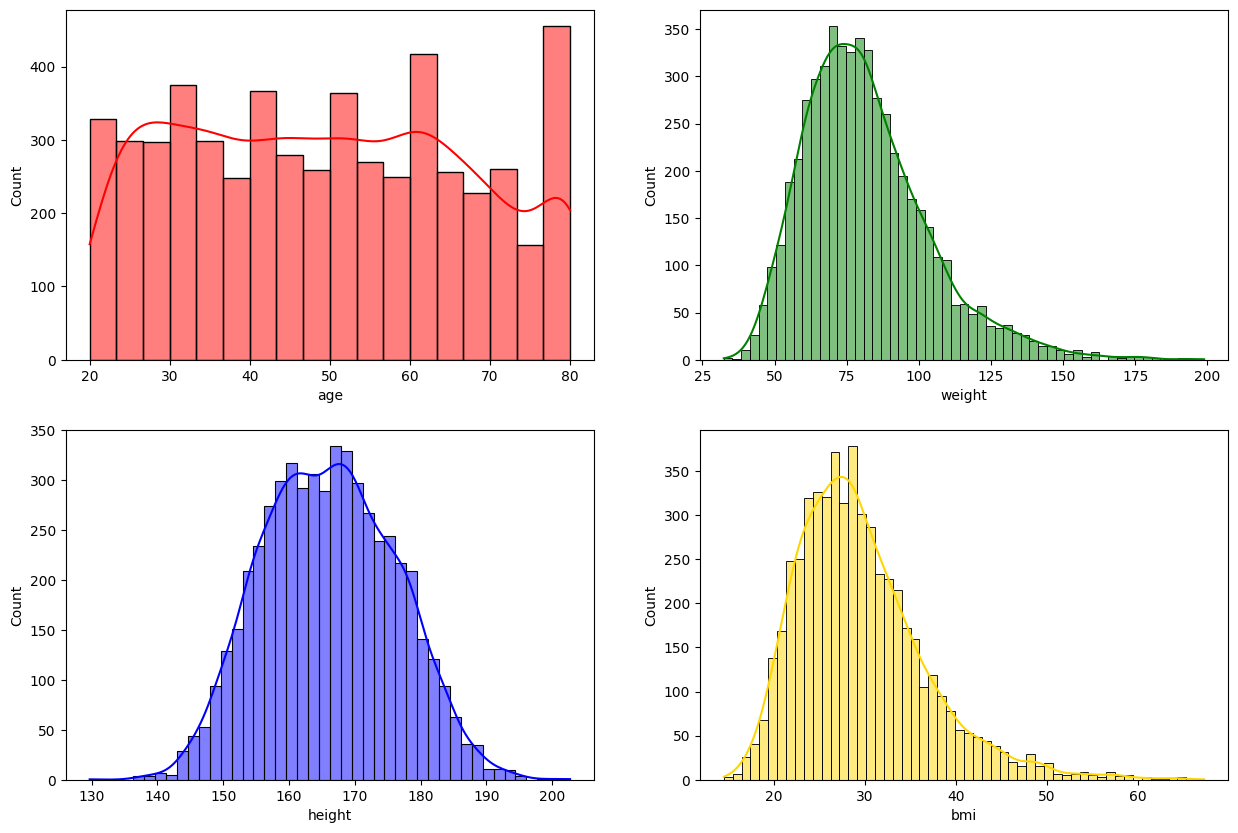

In [114]:
fig, axs = plt.subplots(2,2, figsize = (15, 10)) # 2 X 2 metric where we can add 4 different graps

sns.histplot(data = df, x = 'age', kde = True, color = 'r', ax = axs[0,0])


sns.histplot(data = df, x = 'weight', kde = True, color = 'g', ax = axs[0,1])


sns.histplot(data = df, x = 'height', kde = True, color = 'b', ax = axs[1,0])


sns.histplot(data = df, x = 'bmi', kde = True, color = 'gold', ax = axs[1,1])

### Result
1. Height has a normal distribution, where as weight and bmi is bit  right skewed distribution.

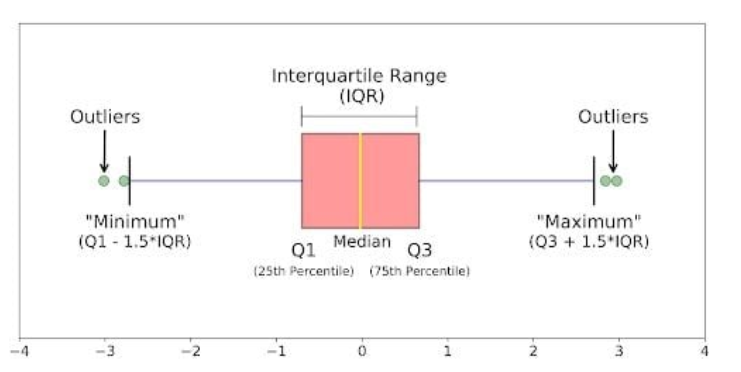


[link text](https://)

<Axes: xlabel='bmi'>

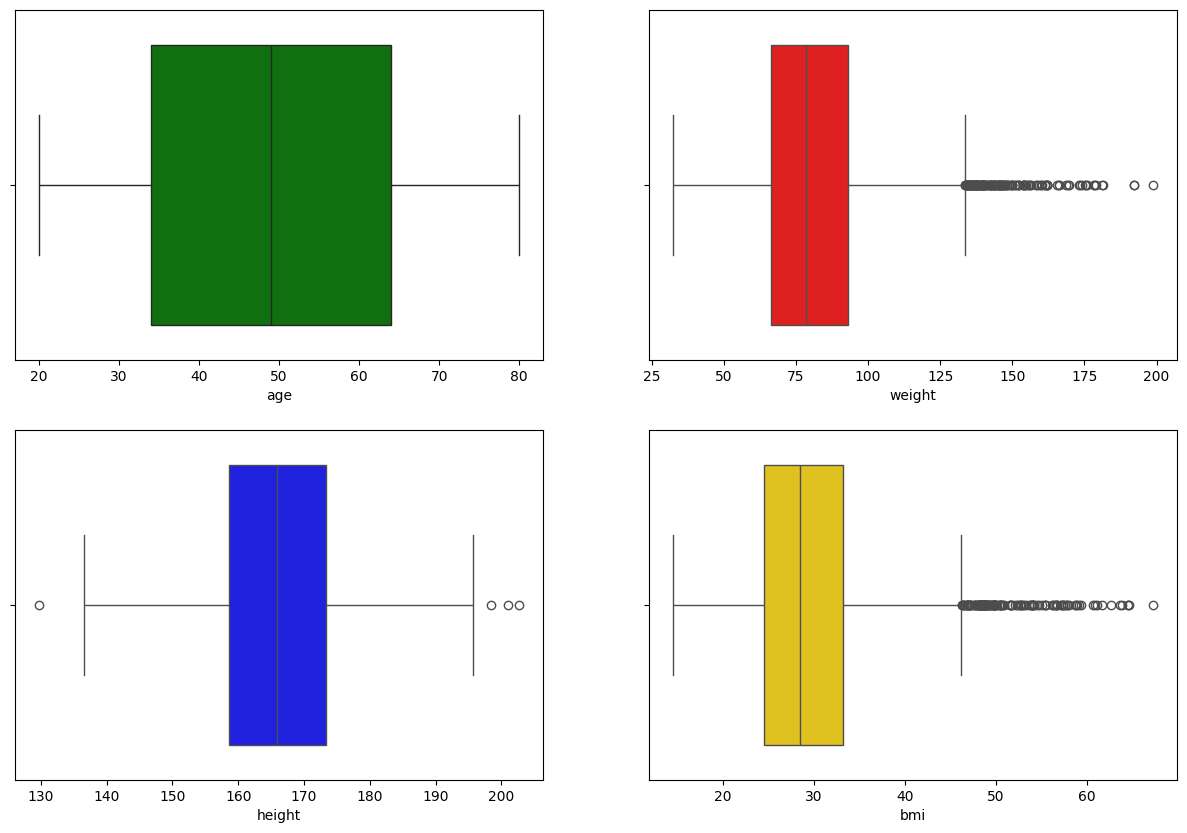

In [115]:
# boxplot to observed the distribution of numerical values

fig, axs = plt.subplots(2,2, figsize = (15,10))

sns.boxplot(data = df, x = 'age', ax = axs[0,0], color = 'g')


sns.boxplot(data = df, x = 'weight', ax = axs[0,1], color = 'r')


sns.boxplot(data = df, x = 'height', ax = axs[1,0], color = 'b')


sns.boxplot(data = df, x = 'bmi', ax = axs[1,1], color = 'gold')

### Result:
1. age has no outliers
2. weight, height, bmi have outliers above max value

- Observation
1. Height have outlier on both min and max values of height
2. bmi and weight have outliers more then max values.


#### Note
1. Median (Q2/50th percentile): The middle value of the data set
2. First Quartile (Q1/25th percentile): The middle number between the smallest number (not the “minimum”) and the median of the data set
3. Third Quartile (Q3/75th percentile): The middle value between the median and the highest value (not the “maximum”) of the dataset
4. Interquartile Range (IQR): 25th to the 75th percentile
Whiskers (shown in blue)
- Outliers (shown as green circles)
- “Minimum”: Q1 - 1.5*IQR
- “Maximum”: Q3 + 1.5*IQR

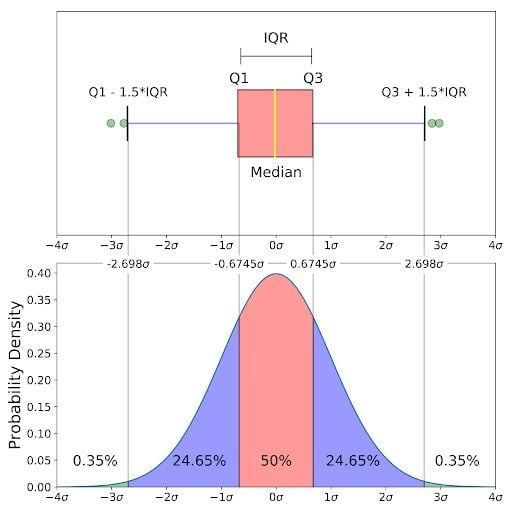

In [116]:
# Height
qh25, qh50, qh75 = np.percentile(df['height'], [25, 50,75])

print(qh25, qh50, qh75)

# @ inter quantile range
iqrh = qh75-qh25
print(iqrh)


minh  = qh25 - 1.5*iqrh
maxh  = qh75 + 1.5*iqrh

print(minh, maxh)

# df[df[df['height'] < minh]  & df[df['height'] >  maxh] ]


158.6 165.9 173.4
14.800000000000011
136.39999999999998 195.60000000000002


### Why 1.5*i1rh

#### Empirical Basis:

 - The 1.5 multiplier is derived from the properties of the normal distribution.

- For a normally distributed dataset, about 99.3% of the data points are expected to lie within the range of Q1 - 1.5IQR to Q3 + 1.5IQR.

-
This means that only a small percentage of points (about 0.7%) will be considered outliers, which aligns well with typical expectations for outlier detection.

In [117]:

df = df[(df['height'] > minh) & (df['height'] < maxh)]

In [118]:
df.head()

,smoking,gender,age,education,weight,height,bmi
0,1,1,62,5.0,94.8,184.5,27.8
1,1,1,53,3.0,90.4,171.4,30.8
2,1,1,78,3.0,83.4,170.1,28.8
3,2,2,56,5.0,109.8,160.9,42.4
4,2,2,42,4.0,55.2,164.9,20.3


In [119]:
# weight
qh25, qh50, qh75 = np.percentile(df['weight'] , [25, 50 , 75])
print(qh25, qh50, qh75)

# maxh
iqrh = qh75 - qh25


maxh = qh75  + 1.3*iqrh


# choose the data of iqr only

df = df[(df['weight'] < maxh)]


66.3 78.5 93.1


In [120]:
# bmi
qh25, qh50, qh75 = np.percentile(df['bmi'], [25, 50, 75] )

iqrh = qh75-qh25

minh = qh25 - 1.5*iqrh

# choose all the data point > minh

df = df[(df['bmi'] > minh)]

In [121]:
maxh = qh75 + 1.3*iqrh
df = df[(df['bmi'] < maxh)]

<Axes: ylabel='bmi'>

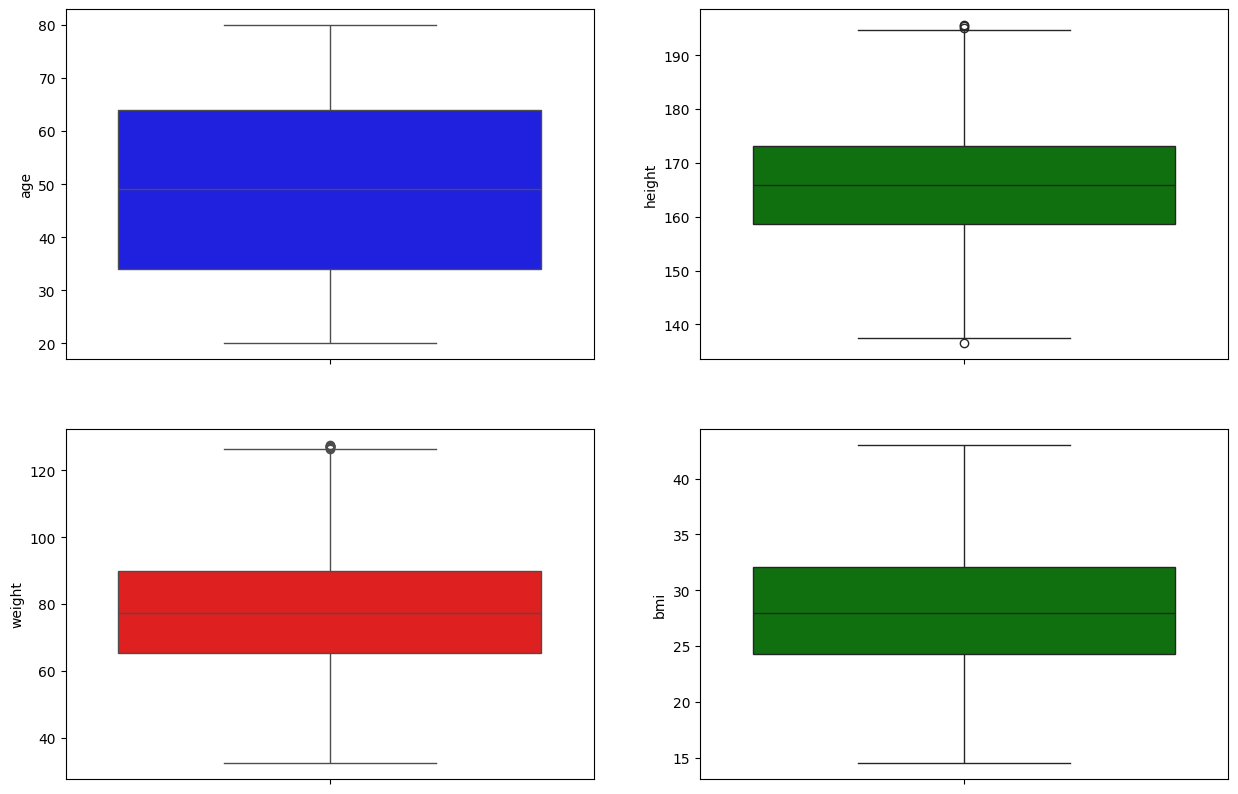

In [122]:
fig, axs  = plt.subplots(2,2, figsize = (15, 10))

sns.boxplot(df['age'], ax = axs[0,0], color = 'b')

sns.boxplot(df['height'], ax = axs[0,1], color = 'g')

sns.boxplot(df['weight'], ax = axs[1,0], color = 'r')

sns.boxplot(df['bmi'], ax = axs[1,1], color = 'g')


### Result
- Numeriacl value is now free from outliers, the result data with normal distribution

<Axes: xlabel='bmi', ylabel='Count'>

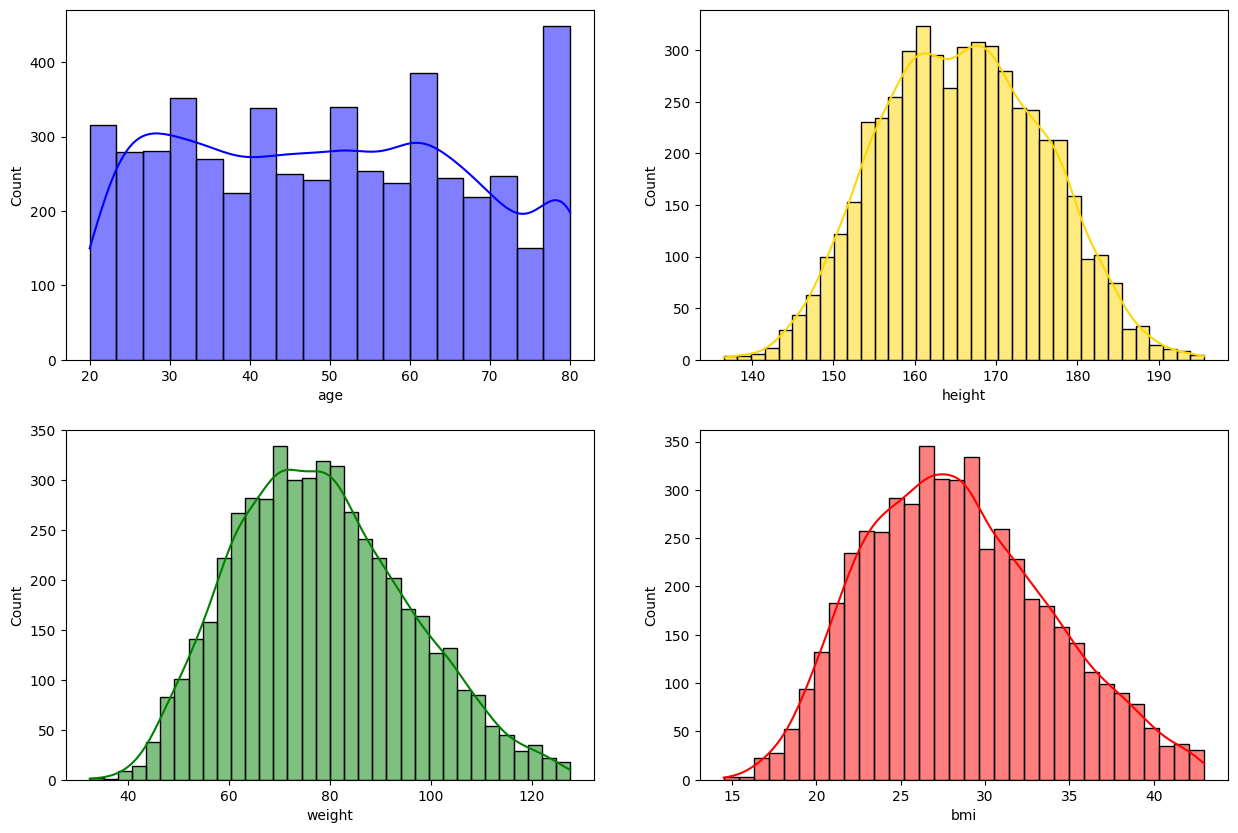

In [123]:
fig, axs = plt.subplots(2,2, figsize = (15,10))

sns.histplot(data = df, x = 'age', ax = axs[0,0], kde = True, color = 'b')

sns.histplot(data = df, x = 'height', ax = axs[0,1], kde = True, color = 'gold')

sns.histplot(data = df, x = 'weight', ax = axs[1,0], kde = True, color = 'g')

sns.histplot(data = df, x = 'bmi', ax = axs[1,1], kde = True, color = 'r')

In [124]:
df.shape

(5073, 7)

In [125]:
df.head()

,smoking,gender,age,education,weight,height,bmi
0,1,1,62,5.0,94.8,184.5,27.8
1,1,1,53,3.0,90.4,171.4,30.8
2,1,1,78,3.0,83.4,170.1,28.8
3,2,2,56,5.0,109.8,160.9,42.4
4,2,2,42,4.0,55.2,164.9,20.3


### Unique values
1. df['col'].unique()
2. df.nunique()

In [126]:
df['smoking'].unique()

array([1, 2, 7, 9])

In [127]:
df.nunique()

smoking        4
gender         2
age           61
education      6
weight       805
height       496
bmi          273
dtype: int64

# 4. Feature Engineering

- Label Encoding: Convert categorical labels into numeric form.
- One-Hot Encoding: Convert categorical variables into a series of binary features.

# Scaling and Normalization:

- Standardization: Scale features to have zero mean and unit variance.
- Normalization: Scale features to a fixed range, typically [0, 1].

# Feature Transformation:

- Log Transformation: Apply a logarithmic transformation to reduce skewness.
- Box-Cox Transformation: Stabilize variance and make the data more normally distributed.

# Dimensionality Reduction:

- Principal Component Analysis (PCA): Reduce the number of features while retaining most of the variance.
- Linear Discriminant Analysis (LDA): Reduce dimensions while maintaining class separability.

In [128]:
df.rename(columns = {'Gender': 'Gender', 'smoking': 'Smoking'}, inplace = True)
df.head()


,Smoking,gender,age,education,weight,height,bmi
0,1,1,62,5.0,94.8,184.5,27.8
1,1,1,53,3.0,90.4,171.4,30.8
2,1,1,78,3.0,83.4,170.1,28.8
3,2,2,56,5.0,109.8,160.9,42.4
4,2,2,42,4.0,55.2,164.9,20.3


In [129]:
df.rename(columns = {'Gender': 'gender', 'Smoking': 'smoking'}, inplace = True)
df.head()

,smoking,gender,age,education,weight,height,bmi
0,1,1,62,5.0,94.8,184.5,27.8
1,1,1,53,3.0,90.4,171.4,30.8
2,1,1,78,3.0,83.4,170.1,28.8
3,2,2,56,5.0,109.8,160.9,42.4
4,2,2,42,4.0,55.2,164.9,20.3


# 4. Feature Engineering
1. One hot encoding for categorical values
2. Log transformation of skewed variables
3. Pairplot features

- One hot encoding:

One-hot encoding is a process used to convert categorical data into a format that can be provided to machine learning algorithms to improve predictions. Most algorithms cannot work with categorical data directly and require all input variables and output variables to be numeric. One-hot encoding converts categorical variables into a series of binary (0 or 1) columns, where each column represents a possible value of the categorical variable.

- Log transformation for skewed data
Log transformation is a powerful technique to handle skewed data. It can be used to reduce skewness, stabilize variance, and make data more normally distributed, which often helps in improving the performance of statistical models and machine learning algorithms. Here’s a detailed explanation of log transformation, how to apply it, and why it’s useful.

  - Why Log Transformation?
Reduce Skewness: Many datasets have skewed distributions, where a large number of values are clustered on one side of the distribution with a long tail on the other. Log transformation can reduce this skewness.
  - Stabilize Variance: Log transformation can help stabilize the variance of a dataset, which can be important for meeting the assumptions of certain statistical tests and models.
  - Improve Model Performance: Many machine learning algorithms perform better when the data is normally distributed or has less skew. Log transformation can help achieve this.
  - When to Use Log Transformation?
When the data is positively skewed (right skewed).
  - When the variance of the data needs to be stabilized.
  - When linear relationships between variables need to be enhanced.

3. Pairplot
- A pairplot, also known as a scatterplot matrix, is a powerful visualization tool that helps in understanding the relationship between multiple variables in a dataset. It creates a matrix of scatterplots for each pair of variables and histograms or kernel density estimates on the diagonals. This is particularly useful for exploratory data analysis (EDA) to identify patterns, correlations, and potential outliers.

- Key Features of Pairplot
1. Scatterplots: Displays the relationship between pairs of variables.
2. Diagonals: Shows the distribution of individual variables using histograms or kernel density plots.
3. Hue: Allows grouping by a categorical variable, using different colors to represent different groups.
4. Customization: Provides various options to customize the appearance and behavior of the plots.

### 4.1 One hot encoding for categorical data

In [130]:

# smoking
df['smoking'] = df['smoking'].replace({1: 'Yes', 2:'No', 7 : np.nan, 9 : np.nan})

df['smoking'].unique()

df.groupby(['smoking'], as_index = False).count()

,smoking,gender,age,education,weight,height,bmi
0,No,2944,2944,2944,2944,2944,2944
1,Yes,2119,2119,2119,2119,2119,2119


In [131]:
# gender
df['gender'] = df['gender'].replace({1 : 'Male', 2 : 'Female'})
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [132]:
# df['education'].unique()

df['education'] = df['education'].replace({1 : '<9th grade', 2 : '9-11 grade', 3 : 'HS or GED', 4 : 'some college', 5 : 'college and above', 9: 'Others'})
df['education'].unique()


df.groupby(['education'], as_index = False).count()

,education,smoking,gender,age,weight,height,bmi
0,9-11 grade,593,594,594,594,594,594
1,<9th grade,621,623,623,623,623,623
2,HS or GED,1092,1094,1094,1094,1094,1094
3,Others,1,3,3,3,3,3
4,college and above,1291,1292,1292,1292,1292,1292
5,some college,1465,1467,1467,1467,1467,1467


In [133]:
categorical = ['smoking', 'gender', 'education']

categorical_data = df[categorical]
categorical_data.head()


,smoking,gender,education
0,Yes,Male,college and above
1,Yes,Male,HS or GED
2,Yes,Male,HS or GED
3,No,Female,college and above
4,No,Female,some college


In [135]:
# get dummies for categorical data
dummy = pd.get_dummies(categorical_data, drop_first = True)
dummy.head()

,smoking_Yes,gender_Male,education_<9th grade,education_HS or GED,education_Others,education_college and above,education_some college
0,True,True,False,False,False,True,False
1,True,True,False,True,False,False,False
2,True,True,False,True,False,False,False
3,False,False,False,False,False,True,False
4,False,False,False,False,False,False,True


- Why Use drop_first=True?
Avoid Multicollinearity: By dropping one category, you prevent multicollinearity, which occurs when one category can be perfectly predicted from the others.
Model Efficiency: Reducing the number of features can lead to more efficient models, especially with large datasets or many categories.
Simpler Interpretation: It simplifies the interpretation of regression coefficients

In [141]:
df.head()
nemerical = df[['age', 'weight', 'height', 'bmi']]
skew_limit = 0.75

skew_values = nemerical.skew()
skew_values

age       0.095351
weight    0.327929
height    0.069982
bmi       0.327263
dtype: float64

In this data we don't hvae variable where skewness > 0.75

### 4.3 Pairplot Feature
- will be using pairplot to obswerve the correlation of variables.

#### Pair Plot: correlations
The sns.pairplot function from the Seaborn library is used to create a grid of scatter plots for each pair of variables in a dataset, along with histograms or KDEs (Kernel Density Estimates) on the diagonal. This function is useful for visualizing relationships between multiple variables and for quickly identifying patterns, trends, and correlations in your data.

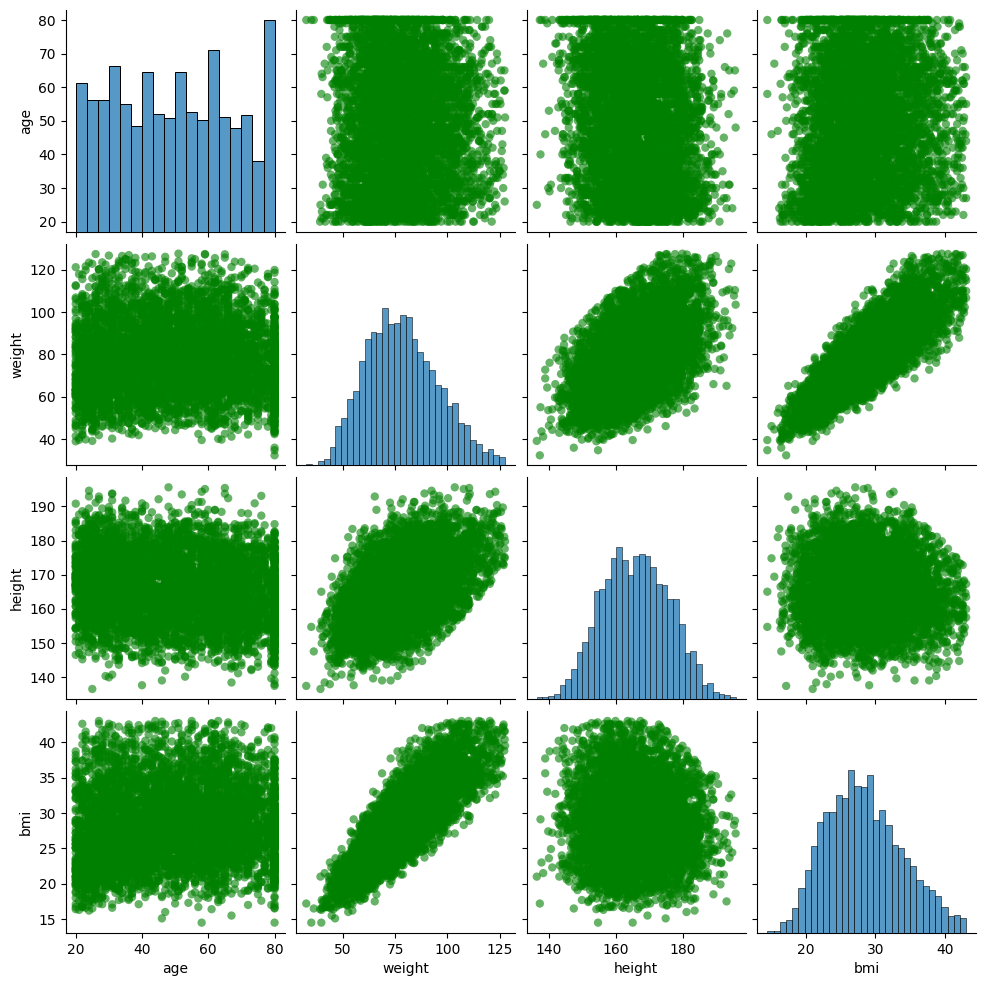

In [145]:
sns.pairplot(data = df, plot_kws = dict(alpha = 0.6, edgecolor = 'none', color = 'g'))

### Result:
- Weight and bmi have positive corelation
- wieght and hight have slightly positve corelation

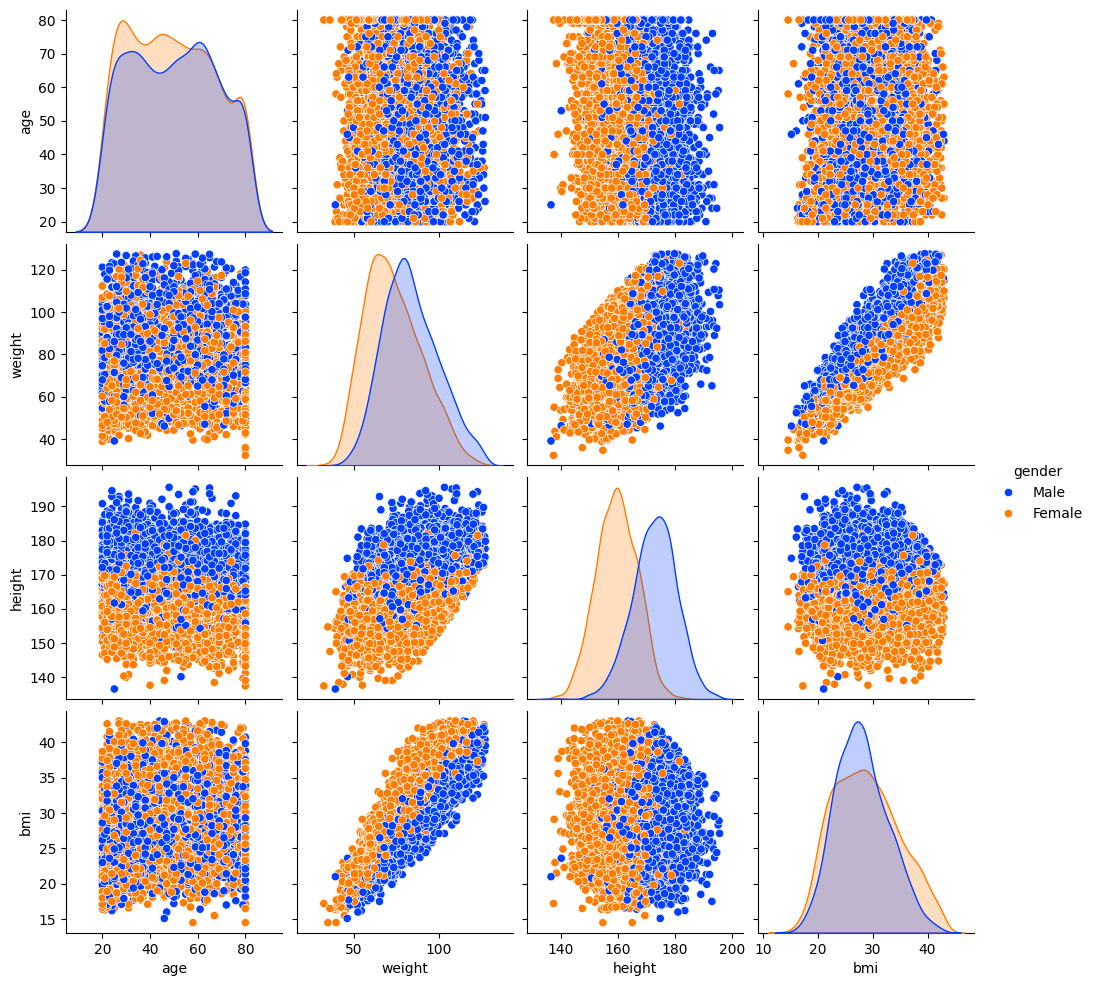

In [147]:
sns.pairplot(data = df, hue = 'gender', palette = 'bright')

### Result
- Distribution of male and feamle seems equal in the postive correlation of wight and bmi
- I can obsefve that in all ages, males relatively higher in height, weight, but in bmi it is vary


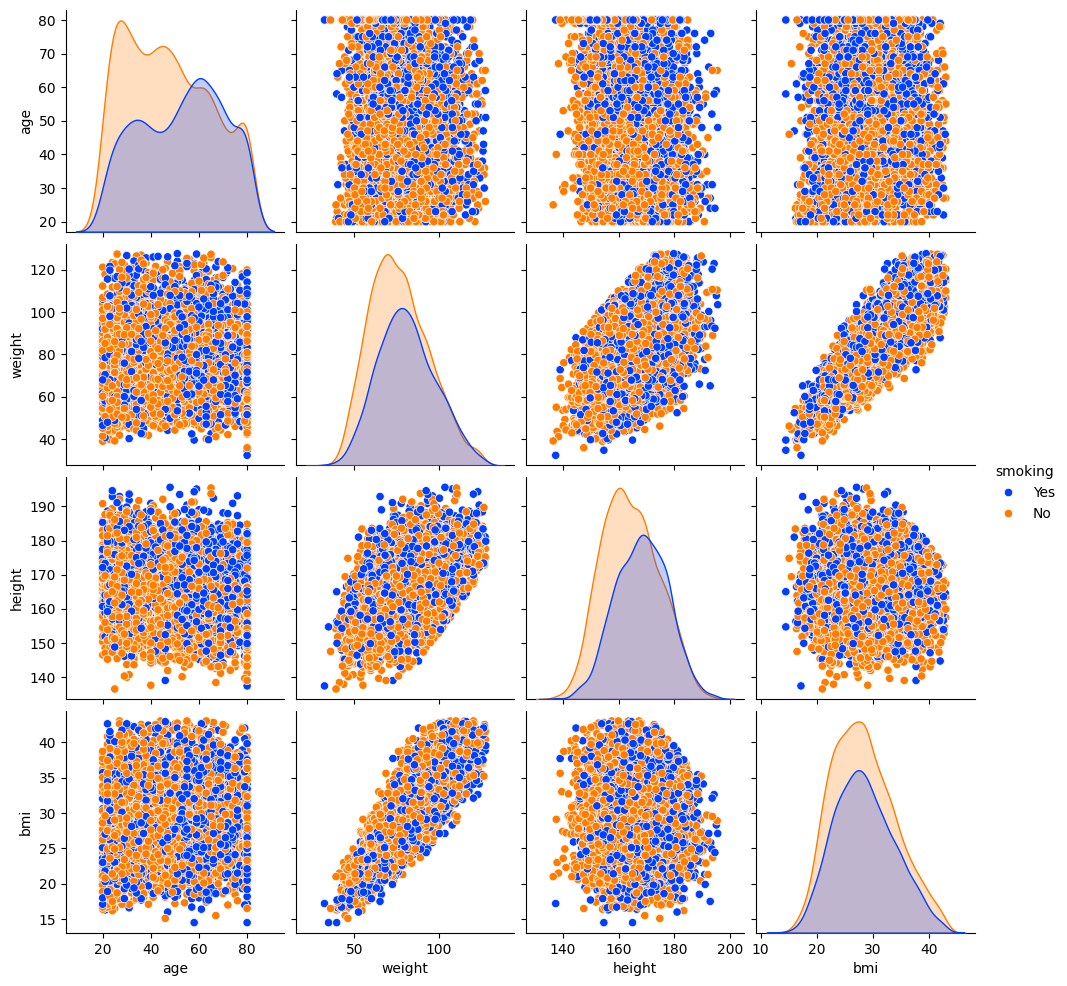

In [149]:
# smoking pairplot
sns.pairplot(data =df , hue = 'smoking', palette = 'bright')

### Result:
- for smoking i see not much distribution of wight, height, or bmi.

# 5. Hypothesis testing
1. Create hypotheses
2. Statical test
3. conclusion



- pd.cut(): This function is from the Pandas library and is used to segment and sort data values into bins or intervals.

- data.age: This represents the column or Series containing the age data that we want to stratify.

- [18, 30, 40, 50, 60, 70, 80]: This list specifies the boundaries of the age bins. Each consecutive pair of numbers in the list defines the lower and upper bounds of a bin. For example, [18, 30] represents the age group from 18 to 30 (inclusive), [30, 40] represents the age group from 30 to 40 (inclusive), and so on.

In [162]:
# df.head()

df['age']  = pd.cut(df['age'], bins = [18, 30, 40, 50, 60, 70, 80])
df['age']

TypeError: '<' not supported between instances of 'int' and 'pandas._libs.interval.Interval'

In [163]:
# Group categorical data
data_cat = data.groupby(['age','gender']).agg({'smoking': [lambda x : np.mean(x == 'yes'), np.size]})
data_cat.columns = ['proportion','size']
data_cat

proportion  size
age gender                  
20  1              0.0    40
    2              0.0    39
21  1              0.0    25
    2              0.0    32
22  1              0.0    50
...                ...   ...
78  2              0.0    21
79  1              0.0    14
    2              0.0    21
80  1              0.0   160
    2              0.0   177

[122 rows x 2 columns]

# 6. Summary
In summary, the dataset I use here relatively friendly and did not need too much intervention for data cleaning because it has no duplicated data and small number of missing values. Besides, the data are also large enough to analyse for various purpose. The distribution of data I used for BMI analysis are also mostly normally distributed or slightly-skewed which make it suitable for modelling.

For further analysis and more accurate modelling, I would encourage to use more variables in the dataset to find more variables which are probably correlated with BMI. There are also some potential that these variables I did not use here were probably skewed and needed more feature engineering process.